   # MAJOR PROJECT ,Semester-7,Computer Science And Engineering.
 

# GURU NANAK DEV ENGINEERING COLLEGE,LUDHIANA,PUNJAB

# Group E-11:
# Prajwal Pant(1507643)
# Simran kaur(1507676)
# Shivam Gupta(1507670)


# PREDICTING RETINAL DAMAGE IN OCT(optical coherence tomography) IMAGES USING DEEP LEARNING.

INTRODUCTION TO PROJECT:

The implementation of clinical-decision support algorithms for medical imaging faces challenges with reliability and interpretability. Here, we establish a diagnostic tool based on a deep-learning framework for the screening of patients with common treatable blinding retinal diseases. Retinal optical coherence tomography (OCT) is an imaging technique used to capture high-resolution cross sections of the retinas of living patients. Approximately 30 million OCT scans are performed each year, and the analysis and interpretation of these images takes up a significant amount of time.The project is about Predicting Retinal Damage in OCT images of patients using deep learning.. Optical coherence tomography (OCT) images (Spectralis  OCT, Heidelberg Engineering, Germany) were selected from retrospective cohorts of adult patients from the Shiley Eye Institute of the University of California San Diego, the California Retinal Research Foundation, Medical Center Ophthalmology Associates, the Shanghai First People’s Hospital, and Beijing Tongren Eye Center between July 1, 2013 and March 1, 2017. The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (NORMAL,CNV,DME,DRUSEN). There are about 40000 images (JPEG) and 4 categories (NORMAL,CNV,DME,DRUSEN). The project requires deep learning skills further Deep learning is basically a sub part of machine learning for the development of better machine learning models and the results are quite better as compared to the shallow machine learning models and the project is implemented in python using keras

As in this project also we have to deal with the OCT images so we have trained our model using (CNN) convolutional neural networks instead of artificial neural network because convolutional layers are preferred for training images.

# Importing Important Libraries from python

In [1]:
import scipy
import skimage
from skimage.transform import resize
import pandas as pd 
%matplotlib inline
import cv2                 
import numpy as np         
import os                  
import glob
from random import shuffle
import random
import matplotlib.pyplot as plt

# Providing the path of dataset i.e Retinal OCT images of patients. 

In [2]:
base_directory="F:/major project gne/OCT2017 "
print(os.listdir(base_directory))

['.DS_Store', 'test', 'train', 'val']


PROVIDING PATH OF TRAIN,TEST AND VALIDATION SET.

In [3]:
train_dir=base_directory+"/train/";
validation_dir=base_directory+"/val/";
test_dir=base_directory+"/test/";

SHOWING THE SUB-DIRECTORIES PRESENT INSIDE TRAIN TEST AND VALIDATION SET.

In [4]:
print(os.listdir(train_dir))

['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [5]:
print(os.listdir(validation_dir))

['.DS_Store', 'CNV', 'DME', 'DRUSEN', 'NORMAL']


In [6]:
print(os.listdir(test_dir))

['.DS_Store', 'CNV', 'DME', 'DRUSEN', 'NORMAL']


# VISUALISING AND ANALYSING THE OCT IMAGES OF PATIENTS ONE BY ONE FROM TRAINING SET!!

# As There are four types of OCT images present in our dataset i.e CNV, DME, DRUSEN, NORMAL.

# RETINAL OCT'S THAT ARE NORMAL:

In [7]:
NORMAL = glob.glob('F:/major project gne/OCT2017 /train/NORMAL/**')

In [8]:
def SHOW_NORMAL(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(25,30))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
    

TWO  RETINAL OCT IMAGES OF PEOPLE THAT ARE NORMAL !!!


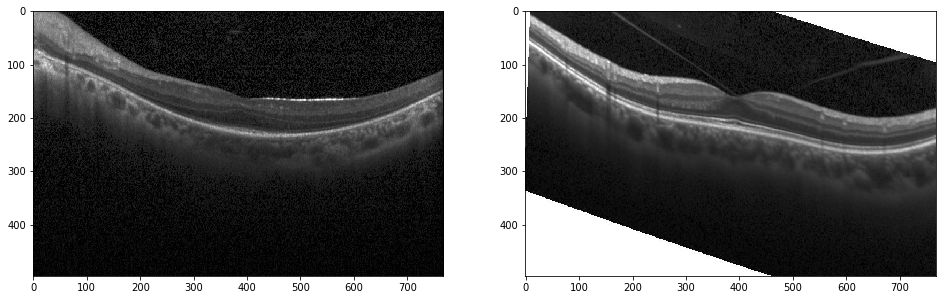

In [9]:
print("TWO  RETINAL OCT IMAGES OF PEOPLE THAT ARE NORMAL !!!")
SHOW_NORMAL(NORMAL)


# VISUALISING NORMAL OCT'S ON LARGER ASPECT!!

------20 OCT IMAGES OF PEOPLE THAT ARE NORMAL---------


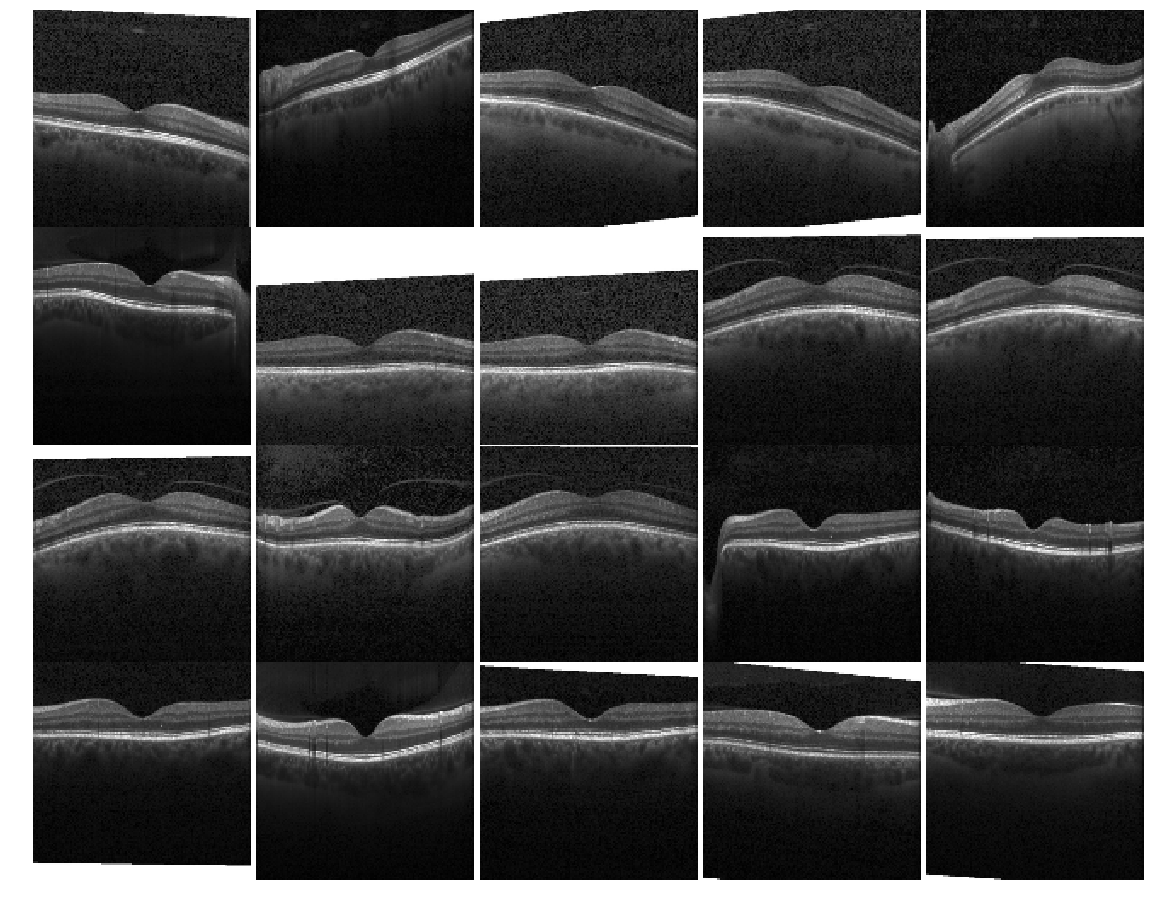

In [10]:
Images_Normal = glob.glob('F:/major project gne/OCT2017 /train/NORMAL/**')
i = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in Images_Normal[:20]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i+= 1
print("------20 OCT IMAGES OF PEOPLE THAT ARE NORMAL---------")

# RETINAL OCT'S THAT HAVE CNV(Choroidal Neo-vascularization):

In [11]:
CNV = glob.glob('F:/major project gne/OCT2017 /train/CNV/**')

In [12]:
def SHOW_CNV(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(25,30))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 
    

TWO  RETINAL OCT IMAGES OF PEOPLE THAT HAVE CNV !!!


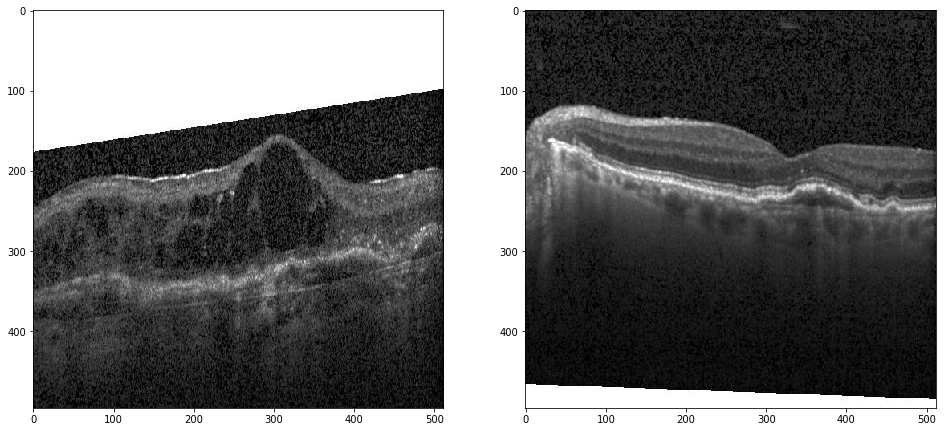

In [13]:
print("TWO  RETINAL OCT IMAGES OF PEOPLE THAT HAVE CNV !!!")
SHOW_CNV(CNV)

# VISUALISING OCT'S TAHT HAVE CNV ON LARGER ASPECT!!

------20 OCT IMAGES OF PEOPLE THAT HAVE CNV---------


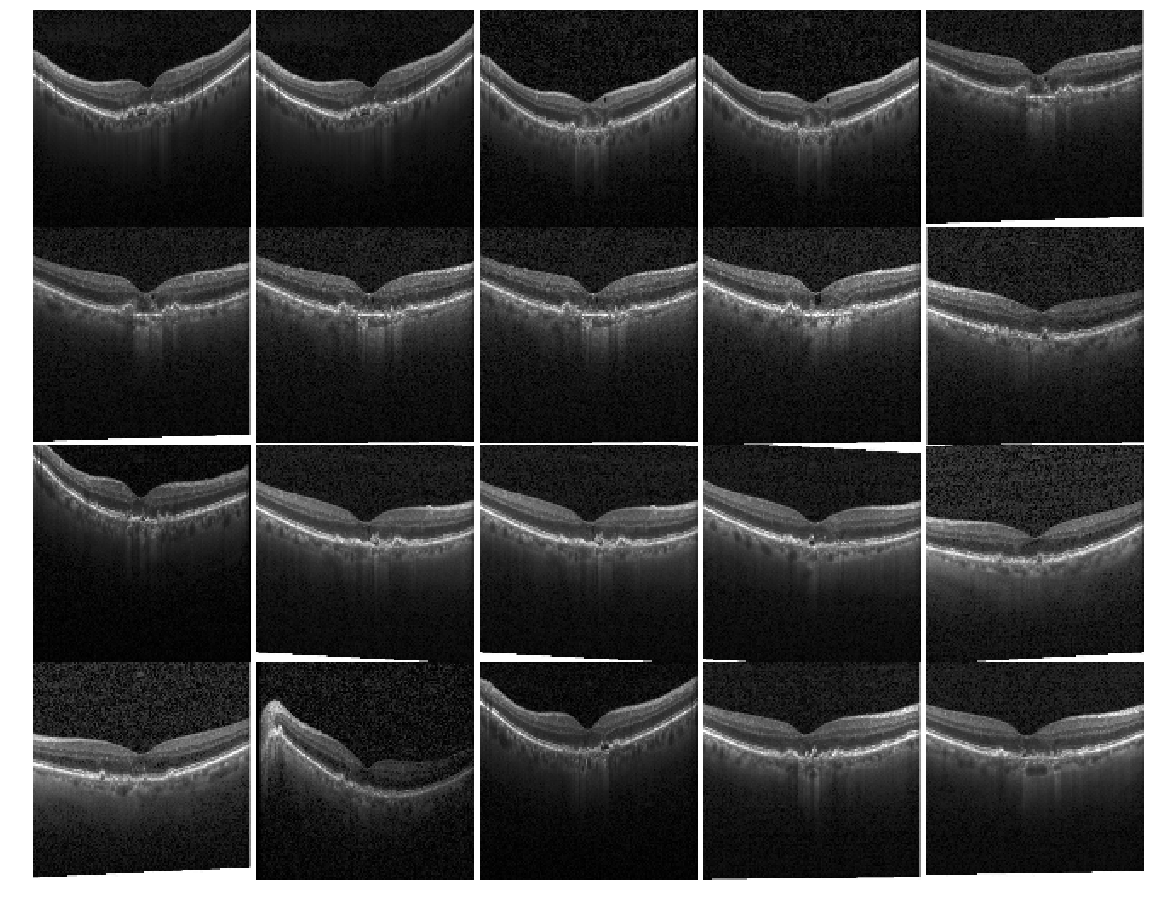

In [14]:
Images_CNV = glob.glob('F:/major project gne/OCT2017 /train/CNV/**')
i = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in Images_CNV[:20]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i+= 1
print("------20 OCT IMAGES OF PEOPLE THAT HAVE CNV---------")

# RETINAL OCT'S THAT HAVE DME(Diabetic Macular Edema ):

In [15]:
DME = glob.glob('F:/major project gne/OCT2017 /train/DME/**')

In [16]:
def SHOW_DME(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(25,30))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 

TWO  RETINAL OCT IMAGES OF PEOPLE THAT HAVE DME !!!


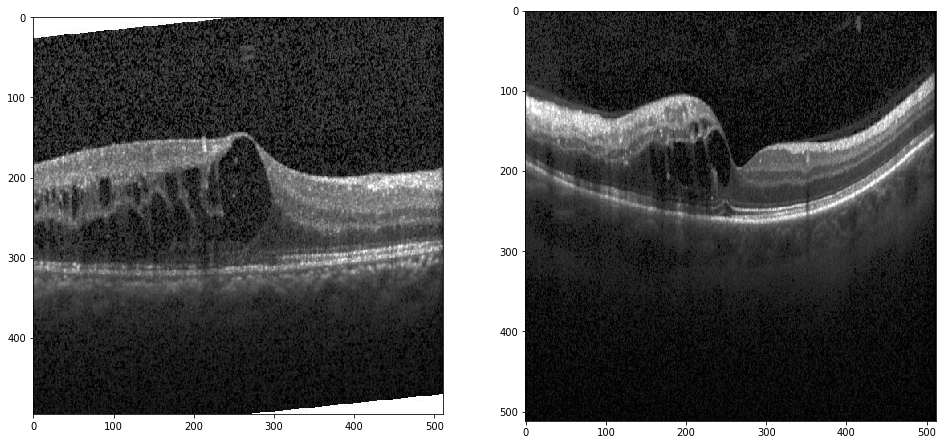

In [17]:
print("TWO  RETINAL OCT IMAGES OF PEOPLE THAT HAVE DME !!!")
SHOW_DME(DME)

# VISUALISING OCT'S TAHT HAVE DME ON LARGER ASPECT!!

------20 OCT IMAGES OF PEOPLE THAT HAVE DME---------


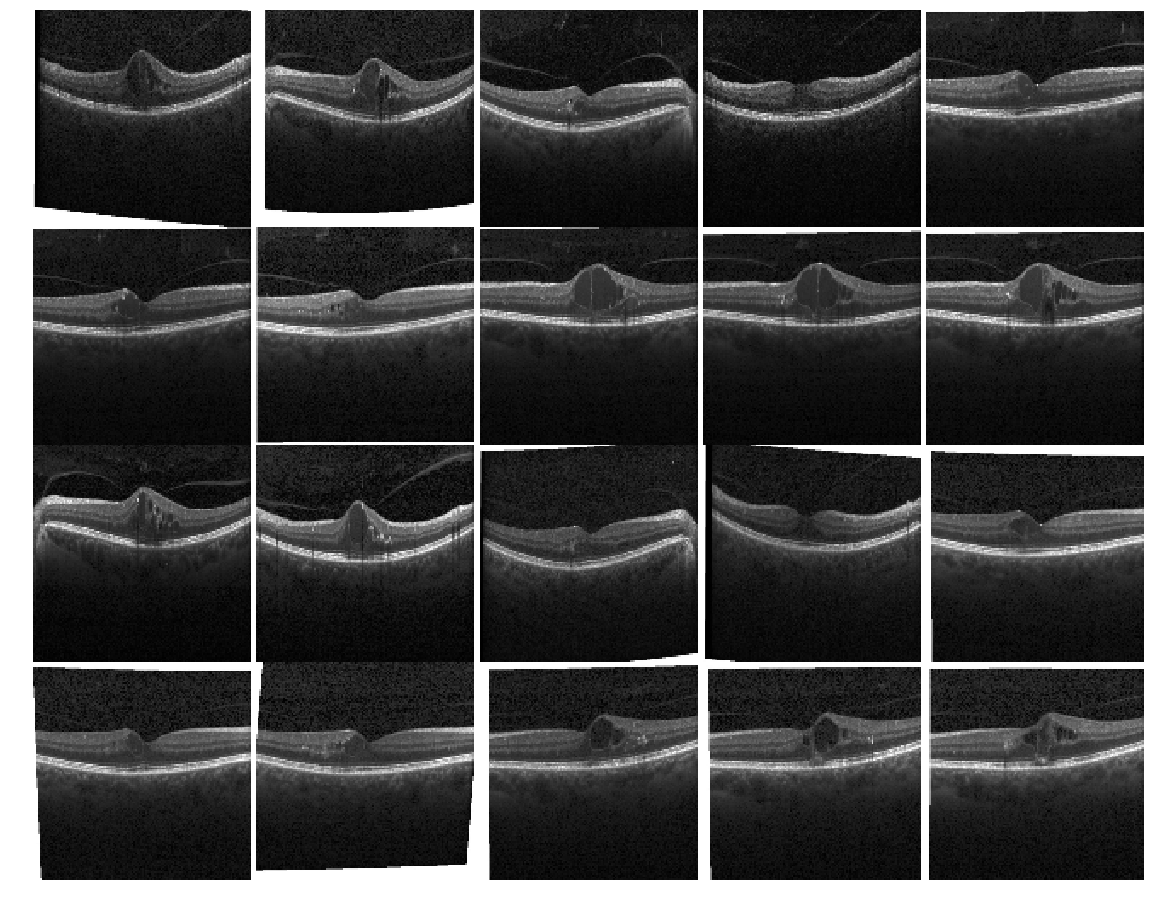

In [18]:
Images_DME = glob.glob('F:/major project gne/OCT2017 /train/DME/**')
i = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in Images_DME[:20]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i+= 1
print("------20 OCT IMAGES OF PEOPLE THAT HAVE DME---------")

# RETINAL OCT'S THAT HAVE DRUSEN:

In [19]:
DRUSEN = glob.glob('F:/major project gne/OCT2017 /train/DRUSEN/**')

In [20]:
def SHOW_DRUSEN(images):
    r = random.sample(images, 3)
    plt.figure(figsize=(25,30))
    plt.subplot(132)
    plt.imshow(cv2.imread(r[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(r[2])); 

TWO  RETINAL OCT IMAGES OF PEOPLE THAT HAVE DRUSEN !!!


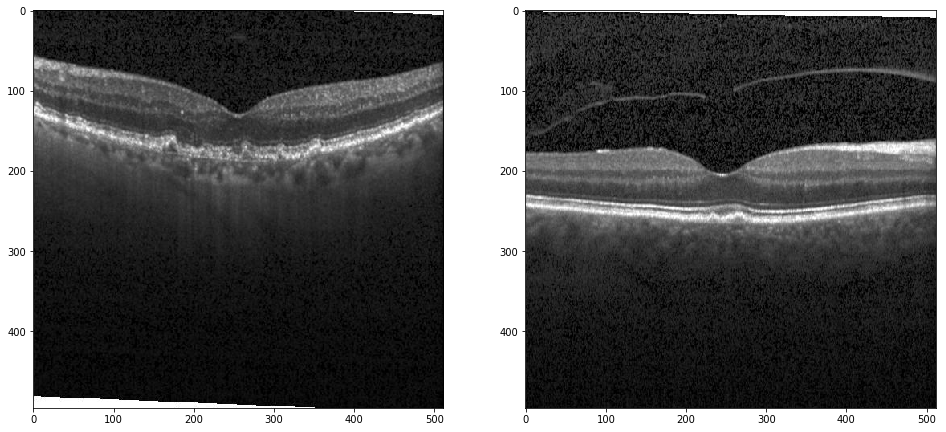

In [21]:
print("TWO  RETINAL OCT IMAGES OF PEOPLE THAT HAVE DRUSEN !!!")
SHOW_DRUSEN(DRUSEN)

------20 OCT IMAGES OF PEOPLE THAT HAVE DRUSEN---------


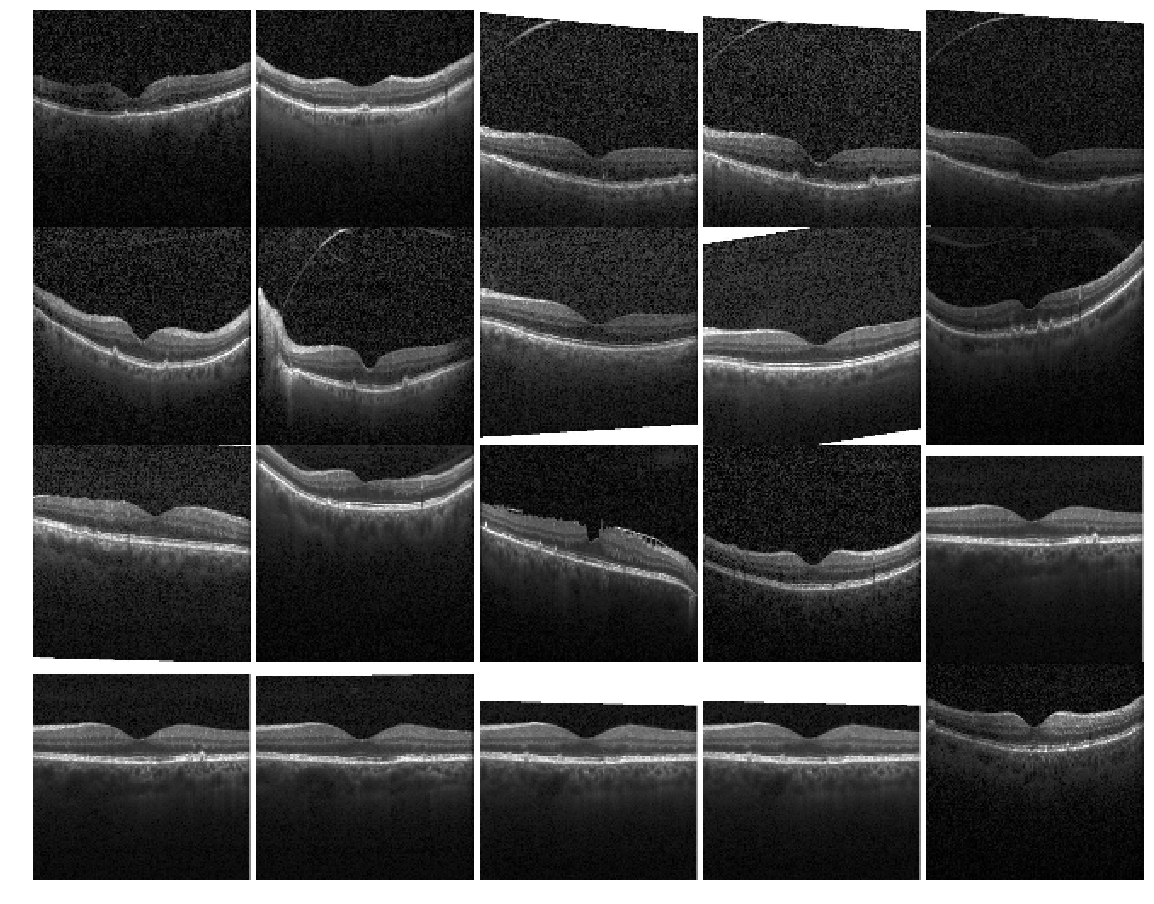

In [22]:
Images_DRUSEN = glob.glob('F:/major project gne/OCT2017 /train/DRUSEN/**')
i = 0
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in Images_DRUSEN[:20]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i+= 1
print("------20 OCT IMAGES OF PEOPLE THAT HAVE DRUSEN---------")

# ANALYSING FREQUENCIES OF SUB-DIRECTORIES FROM TRAINING SET:

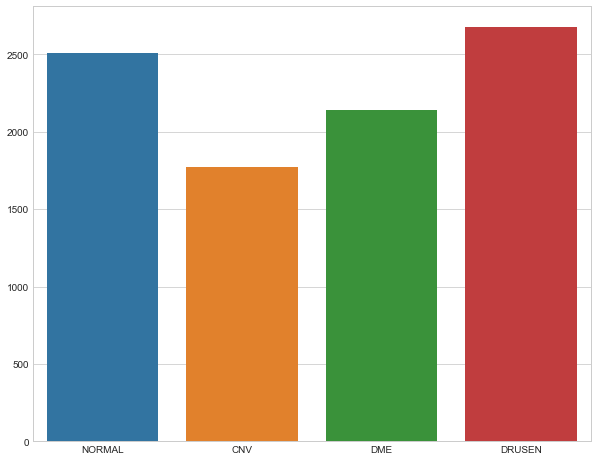

In [23]:
plt.figure(figsize=(10,8))
import seaborn as sns
sns.set_style('whitegrid')
sns.barplot(x=['NORMAL','CNV','DME','DRUSEN'],y=[len(NORMAL),len(CNV),len(DME),len(DRUSEN)])

# DATA PREPROCESSING

In [24]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# DATA AUGMENTATION IS DONE ONE THE DATASET

In [14]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [26]:
from keras.preprocessing import image
img = image.load_img('DME-30521-45.jpeg', target_size=(150, 150))

# YOU CAN SEE HERE THAT HOW WE CAN TRANSFORM ONE IMAGE OF DME BY APPLYING CERTAIN TRANSFORMATIONS!!

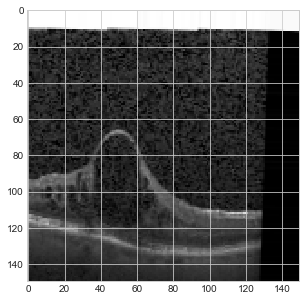

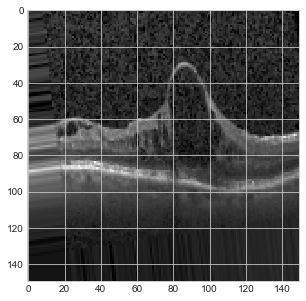

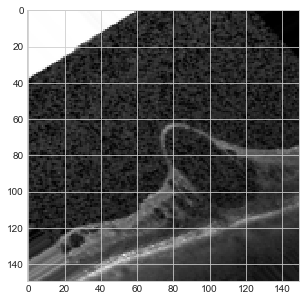

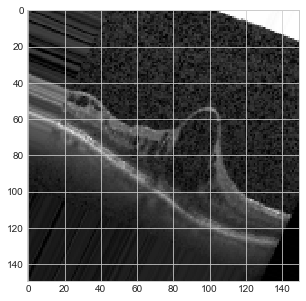

In [27]:
plt.rcParams['figure.figsize'] = (6.0, 5.0)
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) +(150,150,3))
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [28]:
cnv = image.load_img('CNV-6851127-14.jpeg', target_size=(150, 150))

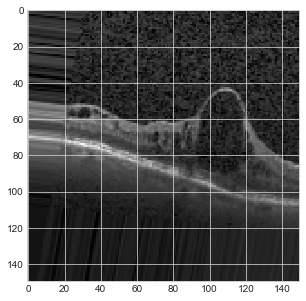

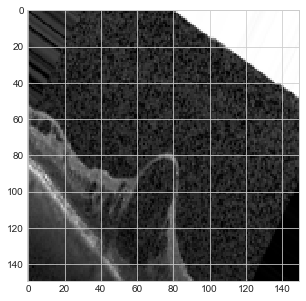

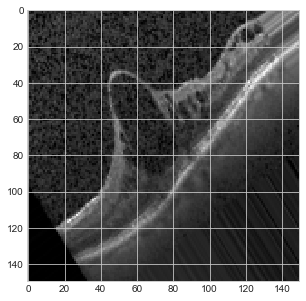

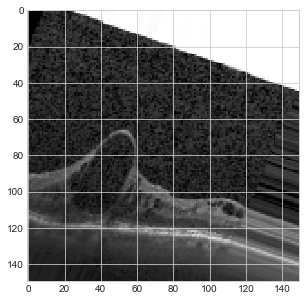

In [29]:
plt.rcParams['figure.figsize'] = (6.0, 5.0)
# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)
# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) +(150,150,3))
# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

# CREATING OUR DEEP LEARNING MODEL FROM SCRATCH USING DATA AUGMENTATION

# IMPLEMENTATION IS DONE IN KERAS !!

In [7]:
from keras import layers
from keras import models

C:\Users\hp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        36928     
__________

In [11]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

In [16]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [15]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='categorical')

Found 9102 images belonging to 4 classes.


In [14]:
train_generator.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [36]:
validation_generator = validation_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=32,
class_mode='categorical')

Found 418 images belonging to 4 classes.


In [18]:
validation_generator.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [40]:
history = model.fit_generator(
train_generator,
steps_per_epoch=284,
epochs=10,
validation_data=validation_generator,
validation_steps=13)

Epoch 1/10
284/284 [==============================] - 658s 2s/step - loss: 1.3685 - acc: 0.2923 - val_loss: 1.3882 - val_acc: 0.2452
Epoch 2/10
284/284 [==============================] - 608s 2s/step - loss: 1.3204 - acc: 0.3482 - val_loss: 1.2577 - val_acc: 0.3342
Epoch 3/10
284/284 [==============================] - 616s 2s/step - loss: 1.2865 - acc: 0.3911 - val_loss: 1.0990 - val_acc: 0.5622
Epoch 4/10
284/284 [==============================] - 611s 2s/step - loss: 1.2579 - acc: 0.3973 - val_loss: 1.0973 - val_acc: 0.5233
Epoch 5/10
284/284 [==============================] - 612s 2s/step - loss: 1.2257 - acc: 0.4272 - val_loss: 1.0085 - val_acc: 0.6114
Epoch 6/10
284/284 [==============================] - 617s 2s/step - loss: 1.1996 - acc: 0.4499 - val_loss: 1.0659 - val_acc: 0.5181
Epoch 7/10
284/284 [==============================] - 617s 2s/step - loss: 1.1561 - acc: 0.4830 - val_loss: 0.8575 - val_acc: 0.6839
Epoch 8/10
284/284 [==============================] - 612s 2s/step - 

In [41]:
model.save('OCT.h5')

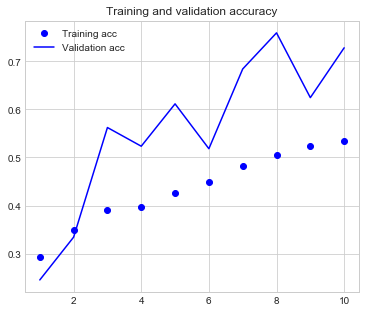

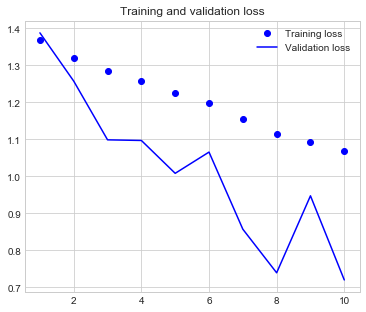

In [42]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [18]:
from keras.models import load_model

In [19]:
model = load_model("OCT.h5")

In [20]:
model.evaluate_generator(generator=validation_generator
)

[0.7281583963969107, 0.7272727272727273]

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        shuffle = False,
        class_mode='categorical',
        batch_size=1)


Found 32 images belonging to 4 classes.


In [23]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)

32/32 [==============================] - 1s 39ms/step


In [24]:
predicted_class_indices=np.argmax(pred,axis=1)

In [25]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [26]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [27]:
results

Filename Predictions
0         CNV\CNV-6294785-1.jpeg         CNV
1         CNV\CNV-6294785-2.jpeg         CNV
2         CNV\CNV-6652117-1.jpeg         CNV
3         CNV\CNV-6668596-1.jpeg         CNV
4         CNV\CNV-6851127-1.jpeg         CNV
5         CNV\CNV-6875371-1.jpeg         CNV
6         CNV\CNV-8184974-1.jpeg         CNV
7         CNV\CNV-8598714-1.jpeg         CNV
8         DME\DME-9583225-1.jpeg      DRUSEN
9         DME\DME-9583225-2.jpeg         DME
10        DME\DME-9603124-1.jpeg         DME
11        DME\DME-9655949-1.jpeg      NORMAL
12        DME\DME-9721607-1.jpeg         DME
13        DME\DME-9721607-2.jpeg         DME
14        DME\DME-9925591-1.jpeg         CNV
15        DME\DME-9925591-2.jpeg         CNV
16  DRUSEN\DRUSEN-9800172-2.jpeg      NORMAL
17  DRUSEN\DRUSEN-9837663-1.jpeg      NORMAL
18  DRUSEN\DRUSEN-9861332-1.jpeg      DRUSEN
19  DRUSEN\DRUSEN-9884539-1.jpeg      DRUSEN
20  DRUSEN\DRUSEN-9884539-2.jpeg         DME
21  DRUSEN\DRUSEN-9894035-1.jpeg      NORMAL
22  DRUSEN\DRUSEN-9894035-2.jpeg      DRUSEN
23  DRUSEN\DRUSEN-9928043-1.jpeg      DRUSEN
24  NORMAL\NORMAL-4872585-1.jpeg      NORMAL
25  NORMAL\NORMAL-5156112-1.jpeg      NORMAL
26  NORMAL\NORMAL-5171640-1.jpeg      NORMAL
27  NORMAL\NORMAL-5193994-1.jpeg      NORMAL
28  NORMAL\NORMAL-5246808-1.jpeg      NORMAL
29  NORMAL\NORMAL-5246808-2.jpeg      NORMAL
30  NORMAL\NORMAL-5324912-1.jpeg      NORMAL
31  NORMAL\NORMAL-9053621-1.jpeg      NORMAL

# NOW WE ARE TRAINING OUR MODEL USING TRANSFER LEARNING WE ARE USING THE WEIGHTS OF PRE-TRAINED MODEL THAT IS VGG16.WE ARE USING TRANSFER LEARNING TO IMPROVE THE MODEL AS OUR DATASET IS NOT VERY LARGE SO TO GET A MORE ACCURATE MODEL WE ARE DOING THIS.

In [25]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150,150,3) )

In [26]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [27]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
Total params: 16,813,124
Trainable params: 16,813,124
Non-trainable params: 0
_________________________________________________________________


In [29]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [30]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [31]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [32]:
from keras import optimizers

In [33]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),
metrics=['acc'])

In [37]:
history = model.fit_generator(
train_generator,
steps_per_epoch=284,
epochs=6,
validation_data=validation_generator,
validation_steps=13,
callbacks = [checkpoint, early])

Epoch 1/6
284/284 [==============================] - 5845s 21s/step - loss: 0.4369 - acc: 0.7952 - val_loss: 0.1687 - val_acc: 0.9555

Epoch 00001: val_acc improved from -inf to 0.95553, saving model to vgg16_1.h5
Epoch 2/6
284/284 [==============================] - 5448s 19s/step - loss: 0.3085 - acc: 0.8656 - val_loss: 0.1103 - val_acc: 0.9689

Epoch 00002: val_acc improved from 0.95553 to 0.96891, saving model to vgg16_1.h5
Epoch 3/6
284/284 [==============================] - 5459s 19s/step - loss: 0.2631 - acc: 0.8877 - val_loss: 0.1070 - val_acc: 0.9637

Epoch 00003: val_acc did not improve from 0.96891
Epoch 4/6
284/284 [==============================] - 5428s 19s/step - loss: 0.2416 - acc: 0.8996 - val_loss: 0.1033 - val_acc: 0.9644

Epoch 00004: val_acc did not improve from 0.96891
Epoch 5/6
284/284 [==============================] - 5426s 19s/step - loss: 0.2259 - acc: 0.9075 - val_loss: 0.0915 - val_acc: 0.9722

Epoch 00005: val_acc improved from 0.96891 to 0.97215, saving mo

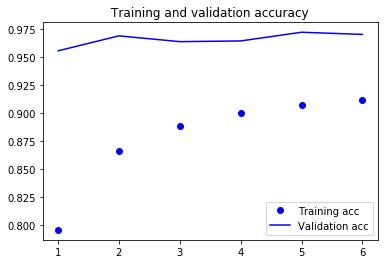

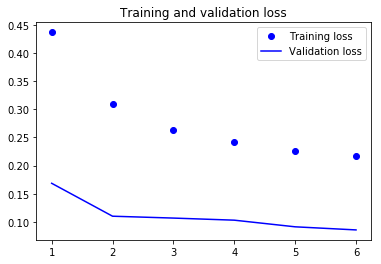

In [38]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
model.evaluate_generator(generator=validation_generator
)

[0.09193306605211285, 0.9677033492822966]

In [40]:
model.save('transfer_OCT.h5')

In [41]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

Found 32 images belonging to 4 classes.


In [42]:
test_generator.reset()
pred=model.predict_generator(test_generator,verbose=1)

32/32 [==============================] - 20s 640ms/step


In [43]:
predicted_class_indices=np.argmax(pred,axis=1)

In [44]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [45]:
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

In [46]:
results

Filename Predictions
0         CNV\CNV-6294785-1.jpeg         CNV
1         CNV\CNV-6294785-2.jpeg      DRUSEN
2         CNV\CNV-6652117-1.jpeg         CNV
3         CNV\CNV-6668596-1.jpeg         CNV
4         CNV\CNV-6851127-1.jpeg      DRUSEN
5         CNV\CNV-6875371-1.jpeg         CNV
6         CNV\CNV-8184974-1.jpeg         CNV
7         CNV\CNV-8598714-1.jpeg         CNV
8         DME\DME-9583225-1.jpeg         DME
9         DME\DME-9583225-2.jpeg         DME
10        DME\DME-9603124-1.jpeg         DME
11        DME\DME-9655949-1.jpeg      DRUSEN
12        DME\DME-9721607-1.jpeg         DME
13        DME\DME-9721607-2.jpeg         DME
14        DME\DME-9925591-1.jpeg         DME
15        DME\DME-9925591-2.jpeg         DME
16  DRUSEN\DRUSEN-9800172-2.jpeg      DRUSEN
17  DRUSEN\DRUSEN-9837663-1.jpeg      DRUSEN
18  DRUSEN\DRUSEN-9861332-1.jpeg      DRUSEN
19  DRUSEN\DRUSEN-9884539-1.jpeg      DRUSEN
20  DRUSEN\DRUSEN-9884539-2.jpeg      DRUSEN
21  DRUSEN\DRUSEN-9894035-1.jpeg      DRUSEN
22  DRUSEN\DRUSEN-9894035-2.jpeg      DRUSEN
23  DRUSEN\DRUSEN-9928043-1.jpeg      DRUSEN
24  NORMAL\NORMAL-4872585-1.jpeg      NORMAL
25  NORMAL\NORMAL-5156112-1.jpeg      NORMAL
26  NORMAL\NORMAL-5171640-1.jpeg      NORMAL
27  NORMAL\NORMAL-5193994-1.jpeg      NORMAL
28  NORMAL\NORMAL-5246808-1.jpeg      NORMAL
29  NORMAL\NORMAL-5246808-2.jpeg      NORMAL
30  NORMAL\NORMAL-5324912-1.jpeg      NORMAL
31  NORMAL\NORMAL-9053621-1.jpeg      NORMAL